In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('fantasy_fb.csv')
df.sample(10)

,week,Oppt,DKP,Price,FDP,Price_f,YHP,Price_y,Name,Team,Pos
7328,1,@ det,NaN,NaN,NaN,NaN,NaN,NaN,Artavis Pierce,Chicago Bears,RB
59,13,lar,18.42,7600.0,17.42,8700.0,17.42,36.0,Kyler Murray,Arizona Cardinals,QB
6332,14,@ phi,NaN,4000.0,.,4600.0,.,10.0,Ty Montgomery,New Orleans Saints,RB
6763,13,@ chi,NaN,4600.0,.,6000.0,.,20.0,Chase Daniel,Detroit Lions,QB
9121,3,@ nyg,NaN,NaN,.,NaN,.,NaN,Kevin White,San Francisco 49ers,WR
4608,1,ari,NaN,2500.0,.,4200.0,.,10.0,Ross Dwelley,San Francisco 49ers,TE
9356,15,hou,NaN,2500.0,NaN,4000.0,NaN,NaN,Noah Togiai,Indianapolis Colts,TE
4622,16,@ ari,NaN,2500.0,.,4300.0,.,10.0,Ross Dwelley,San Francisco 49ers,TE
4729,11,@ cle,NaN,3000.0,.,4500.0,.,10.0,DeSean Jackson,Philadelphia Eagles,WR
2776,9,nor,2.00,4100.0,1.50,5900.0,1.50,15.0,Scott Miller,Tampa Bay Buccaneers,WR


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   week     9551 non-null   int64  
 1   Oppt     9551 non-null   object 
 2   DKP      5359 non-null   float64
 3   Price    8359 non-null   float64
 4   FDP      7549 non-null   object 
 5   Price_f  8691 non-null   float64
 6   YHP      7549 non-null   object 
 7   Price_y  8322 non-null   float64
 8   Name     9551 non-null   object 
 9   Team     9551 non-null   object 
 10  Pos      9551 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 820.9+ KB


In [3]:
df.describe()

,week,DKP,Price,Price_f,Price_y
count,9551.000000,5359.000000,8359.000000,8691.000000,8322.000000
mean,9.057481,9.116947,4187.366910,5313.922449,14.951935
std,5.007423,8.885072,1374.290739,1165.012354,6.770756
min,1.000000,-1.100000,2500.000000,4000.000000,10.000000
25%,5.000000,2.100000,3000.000000,4500.000000,10.000000
50%,9.000000,6.600000,4000.000000,4800.000000,11.000000
75%,13.500000,13.700000,5000.000000,6000.000000,20.000000
max,17.000000,60.900000,10000.000000,11000.000000,43.000000


In [4]:
df = df.drop(columns=['FDP','Price_f','YHP','Price_y'])
df.describe()

,week,DKP,Price
count,9551.000000,5359.000000,8359.000000
mean,9.057481,9.116947,4187.366910
std,5.007423,8.885072,1374.290739
min,1.000000,-1.100000,2500.000000
25%,5.000000,2.100000,3000.000000
50%,9.000000,6.600000,4000.000000
75%,13.500000,13.700000,5000.000000
max,17.000000,60.900000,10000.000000


In [5]:
df.head()

,week,Oppt,DKP,Price,Name,Team,Pos
0,1,nyj,33.18,6500.0,Josh Allen,Buffalo Bills,QB
1,2,@ mia,37.48,6700.0,Josh Allen,Buffalo Bills,QB
2,3,lar,36.24,6900.0,Josh Allen,Buffalo Bills,QB
3,4,@ lvr,25.42,7300.0,Josh Allen,Buffalo Bills,QB
4,5,@ ten,18.32,7500.0,Josh Allen,Buffalo Bills,QB


In [7]:
#Split homes and away games
df['away'] = df['Oppt'].apply(lambda x: len(x.split('@'))-1)
df_hva = df[['DKP', 'Price', 'Name', 'Team', 'Pos', 'away']]
df_hva_std = df_hva.copy()

df_hva.head()

,DKP,Price,Name,Team,Pos,away
0,33.18,6500.0,Josh Allen,Buffalo Bills,QB,0
1,37.48,6700.0,Josh Allen,Buffalo Bills,QB,1
2,36.24,6900.0,Josh Allen,Buffalo Bills,QB,0
3,25.42,7300.0,Josh Allen,Buffalo Bills,QB,1
4,18.32,7500.0,Josh Allen,Buffalo Bills,QB,1


In [8]:
#group by with mean and std agg functions
df_hva_std = df_hva.groupby(by=['Pos', 'away', 'Team', 'Name']).std()
df_hva = df_hva.groupby(by=['Pos', 'away', 'Team', 'Name']).mean()

df_hva.head(10)

DKP        Price
Pos away Team              Name                                    
QB  0    Arizona Cardinals Chris Streveler         NaN  4337.500000
                           Kyler Murray        30.5875  7237.500000
         Atlanta Falcons   Matt Ryan           19.1000  6175.000000
                           Matt Schaub         -0.4000  4587.500000
         Baltimore Ravens  Lamar Jackson       21.5950  7714.285714
                           Robert Griffin III   0.0800  4328.571429
                           Trace McSorley          NaN  4071.428571
                           Tyler Huntley        2.0800  4100.000000
         Buffalo Bills     Josh Allen          24.3775  7200.000000
                           Matt Barkley         9.2600  4312.500000

In [164]:
#isolate by QB position
qb_h_m = df_hva.loc['QB', 0]
#qb_h['DKP_stdev'] = np.std(qb_h['DKP'])
qb_a_m = df_hva.loc['QB', 1]

qb_h_std = df_hva_std.loc['QB', 0]
qb_a_std = df_hva_std.loc['QB', 1]

#Fix column names
qb_h_m = qb_h_m.rename(columns={'DKP': 'DKP_home_mean', 'Price': 'Price_home_mean'})
qb_a_m = qb_a_m.rename(columns={'DKP': 'DKP_away_mean', 'Price': 'Price_away_mean'})
qb_a_std = qb_a_std.rename(columns={'DKP': 'DKP_away_std', 'Price': 'Price_away_std'})
qb_h_std = qb_h_std.rename(columns={'DKP': 'DKP_home_std', 'Price': 'Price_home_std'})
#qb_a['DKP_stdev_away'] = np.std(qb_a['DKP_away'])

qb_h_m.head()

DKP_home_mean  Price_home_mean
Team              Name                                           
Arizona Cardinals Chris Streveler            NaN      4337.500000
                  Kyler Murray           30.5875      7237.500000
Atlanta Falcons   Matt Ryan              19.1000      6175.000000
                  Matt Schaub            -0.4000      4587.500000
Baltimore Ravens  Lamar Jackson          21.5950      7714.285714

In [118]:
qb_h_std.head()

DKP_home_std  Price_home_std
Team              Name                                         
Arizona Cardinals Chris Streveler           NaN      413.823634
                  Kyler Murray         9.907826      616.296543
Atlanta Falcons   Matt Ryan            8.043738      506.387768
                  Matt Schaub               NaN      274.837614
Baltimore Ravens  Lamar Jackson        5.991391      313.201593

In [114]:
#merge data
qb = qb_h_m.merge(qb_a_m, how='left', on=['Team', 'Name'])
qb = qb.merge(qb_h_std, how='left', on=['Team', 'Name'])
qb = qb.merge(qb_a_std, how='left', on=['Team', 'Name'])
qb.head(10)

DKP_home_mean  Price_home_mean  \
Team              Name                                                 
Arizona Cardinals Chris Streveler               NaN      4337.500000   
                  Kyler Murray              30.5875      7237.500000   
Atlanta Falcons   Matt Ryan                 19.1000      6175.000000   
                  Matt Schaub               -0.4000      4587.500000   
Baltimore Ravens  Lamar Jackson             21.5950      7714.285714   
                  Robert Griffin III         0.0800      4328.571429   
                  Trace McSorley                NaN      4071.428571   
                  Tyler Huntley              2.0800      4100.000000   
Buffalo Bills     Josh Allen                24.3775      7200.000000   
                  Matt Barkley               9.2600      4312.500000   

                                      DKP_away_mean  Price_away_mean  \
Team              Name                                                 
Arizona Cardinals Chris Streveler          4.350000           4375.0   
                  Kyler Murray            20.255000           7412.5   
Atlanta Falcons   Matt Ryan               19.830000           6150.0   
                  Matt Schaub                   NaN           4512.5   
Baltimore Ravens  Lamar Jackson           25.574286           7475.0   
                  Robert Griffin III       2.710000           4262.5   
                  Trace McSorley           4.650000           4037.5   
                  Tyler Huntley            0.820000           4900.0   
Buffalo Bills     Josh Allen              30.127500           7287.5   
                  Matt Barkley             0.510000           4350.0   

                                      DKP_home_std  Price_home_std  \
Team              Name                                               
Arizona Cardinals Chris Streveler              NaN      413.823634   
                  Kyler Murray            9.907826      616.296543   
Atlanta Falcons   Matt Ryan               8.043738      506.387768   
                  Matt Schaub                  NaN      274.837614   
Baltimore Ravens  Lamar Jackson           5.991391      313.201593   
                  Robert Griffin III      0.254558      256.347978   
                  Trace McSorley               NaN      149.602648   
                  Tyler Huntley                NaN             NaN   
Buffalo Bills     Josh Allen             10.072369      459.813627   
                  Matt Barkley                 NaN      247.487373   

                                      DKP_away_std  Price_away_std  
Team              Name                                              
Arizona Cardinals Chris Streveler         5.727565      416.619045  
                  Kyler Murray            9.592692      666.413642  
Atlanta Falcons   Matt Ryan               9.444109      350.509833  
                  Matt Schaub                  NaN      264.237447  
Baltimore Ravens  Lamar Jackson           7.157855      584.929788  
                  Robert Griffin III      4.822468      272.226271  
                  Trace McSorley          5.699281       74.402381  
                  Tyler Huntley                NaN             NaN  
Buffalo Bills     Josh Allen              8.147820      304.431555  
                  Matt Barkley            0.523259      333.809184

In [154]:
qb['road_consistency'] = qb['DKP_home_std'] - qb['DKP_away_std']
qb['road_performance_avg'] = qb['DKP_away_mean'] - qb['DKP_home_mean'] 
qb['road_price_avg'] = qb['Price_away_mean'] - qb['Price_home_mean']
qb_2 = qb.reset_index()
#qb.head()
qb_res = qb_2[['Team', 'Name', 'road_consistency', 'road_performance_avg', 'road_price_avg', 'DKP_home_mean']]
qb_res.head(10)

,Team,Name,road_consistency,road_performance_avg,road_price_avg,DKP_home_mean
0,Arizona Cardinals,Chris Streveler,NaN,NaN,37.500000,NaN
1,Arizona Cardinals,Kyler Murray,0.315134,-10.332500,175.000000,30.5875
2,Atlanta Falcons,Matt Ryan,-1.400372,0.730000,-25.000000,19.1000
3,Atlanta Falcons,Matt Schaub,NaN,NaN,-75.000000,-0.4000
4,Baltimore Ravens,Lamar Jackson,-1.166464,3.979286,-239.285714,21.5950
5,Baltimore Ravens,Robert Griffin III,-4.567910,2.630000,-66.071429,0.0800
6,Baltimore Ravens,Trace McSorley,NaN,NaN,-33.928571,NaN
7,Baltimore Ravens,Tyler Huntley,NaN,-1.260000,800.000000,2.0800
8,Buffalo Bills,Josh Allen,1.924550,5.750000,87.500000,24.3775
9,Buffalo Bills,Matt Barkley,NaN,-8.750000,37.500000,9.2600


In [165]:
#Drop NaNs and sort 
qb_res = qb_res.dropna()
qb_res= qb_res[qb_res['DKP_home_mean'] >= 15]
qb_res = qb_res.sort_values('road_performance_avg')
qb_res = qb_res.reset_index(drop=True)
qb_res.head(10)

,Team,Name,road_consistency,road_performance_avg,road_price_avg,DKP_home_mean
0,Arizona Cardinals,Kyler Murray,0.315134,-10.332500,175.000000,30.587500
1,Dallas Cowboys,Dak Prescott,5.329127,-7.946667,-303.571429,33.506667
2,Philadelphia Eagles,Carson Wentz,1.401718,-7.426667,-76.785714,22.080000
3,Miami Dolphins,Ryan Fitzpatrick,-5.145936,-7.373333,-200.000000,23.886667
4,Minnesota Vikings,Kirk Cousins,-6.325316,-7.250000,-50.000000,24.825000
5,Cincinnati Bengals,Joe Burrow,1.852348,-6.180000,175.000000,23.480000
6,Tennessee Titans,Ryan Tannehill,5.745245,-5.240000,200.000000,25.200000
7,Pittsburgh Steelers,Ben Roethlisberger,0.948412,-3.736071,100.000000,21.287500
8,Seattle Seahawks,Russell Wilson,-1.758792,-3.172500,87.500000,26.072500
9,San Francisco 49ers,Nick Mullens,0.334802,-3.070000,-312.500000,15.670000


In [166]:
qb_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Team                  27 non-null     object 
 1   Name                  27 non-null     object 
 2   road_consistency      27 non-null     float64
 3   road_performance_avg  27 non-null     float64
 4   road_price_avg        27 non-null     float64
 5   DKP_home_mean         27 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.4+ KB


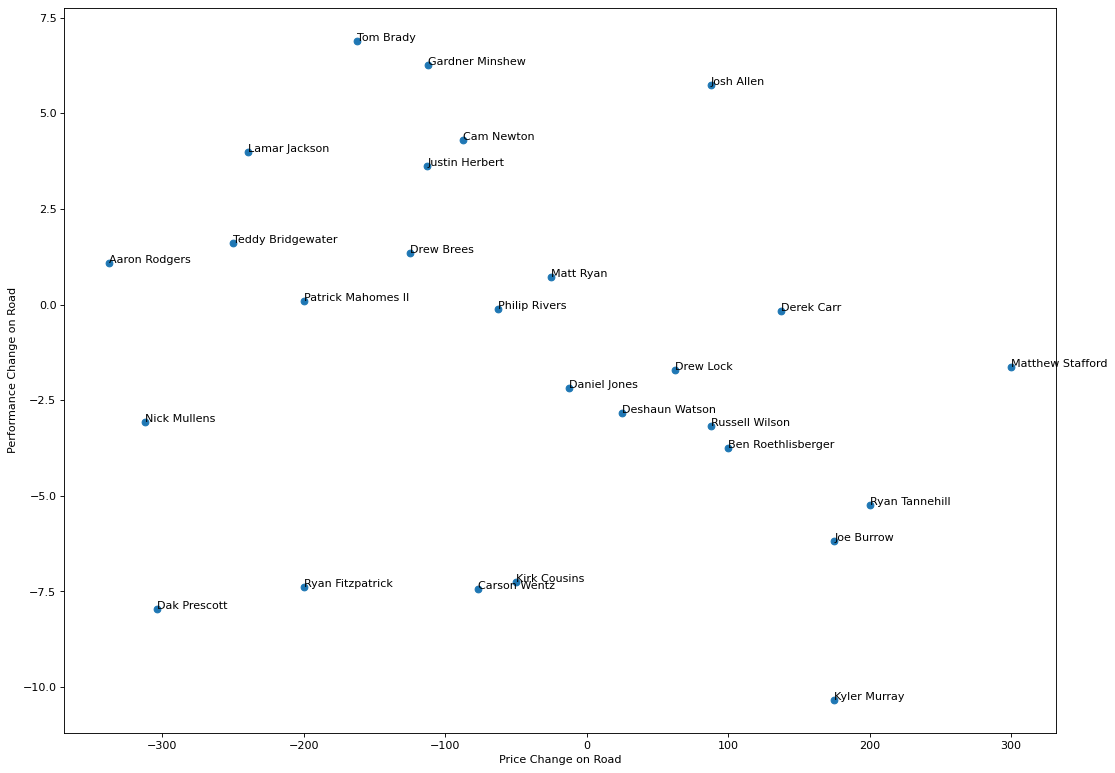

In [167]:
#plot performance vs price
fig  = plt.figure(figsize=(16, 12), dpi=80)
visual = plt.scatter(qb_res["road_price_avg"], qb_res["road_performance_avg"])
plt.xlabel('Price Change on Road')
plt.ylabel('Performance Change on Road')
for i, txt in enumerate(qb_res['Name']):
    plt.annotate(txt, (qb_res["road_price_avg"][i], qb_res["road_performance_avg"][i]))
